# Clustering examples

## Uniform 2D samples

Let's start with generating 1000 points randomly on a plane, then see what various algorithm will find.

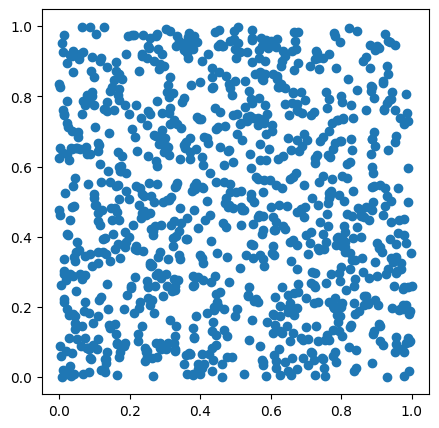

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ncl = 5

xx = np.random.rand(1000, 2)
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(xx[:, 0], xx[:, 1])


For instance, we can see that with k-means clustering we obtain very different results, due to the randomness of both points and initial centroids.

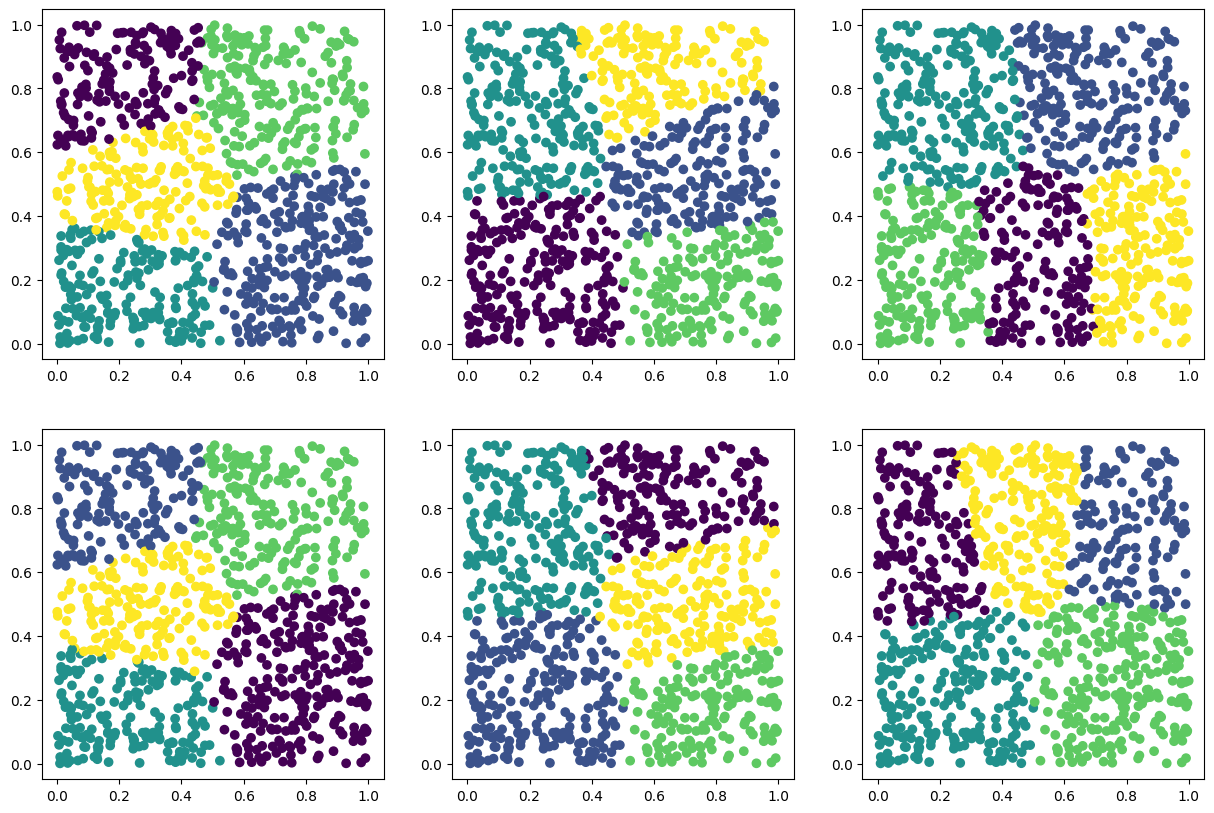

In [2]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i in range(6):
    kmeans = KMeans(n_clusters=Ncl, max_iter=10, n_init='auto').fit(xx)
    ax[i//3, i % 3].scatter(xx[:, 0], xx[:, 1], c=kmeans.labels_)


On the other hand, we can see how DB scan is able to recognize the randomness of such points as noise.


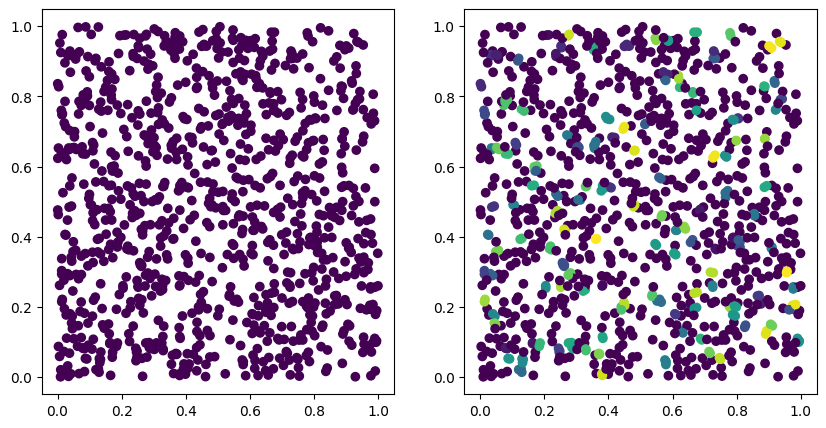

In [3]:
from sklearn.cluster import DBSCAN

Np = 1000

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

DBlbl = DBSCAN(eps=0.001, min_samples=5).fit_predict(xx)
ax[0].scatter(xx[:, 0], xx[:, 1], c=DBlbl)

DBlbl = DBSCAN(eps=0.01, min_samples=2).fit_predict(xx)
ax[1].scatter(xx[:, 0], xx[:, 1], c=DBlbl)


## Multiple clusters

In [4]:
fp = './data/birch2_sineCurve.txt'


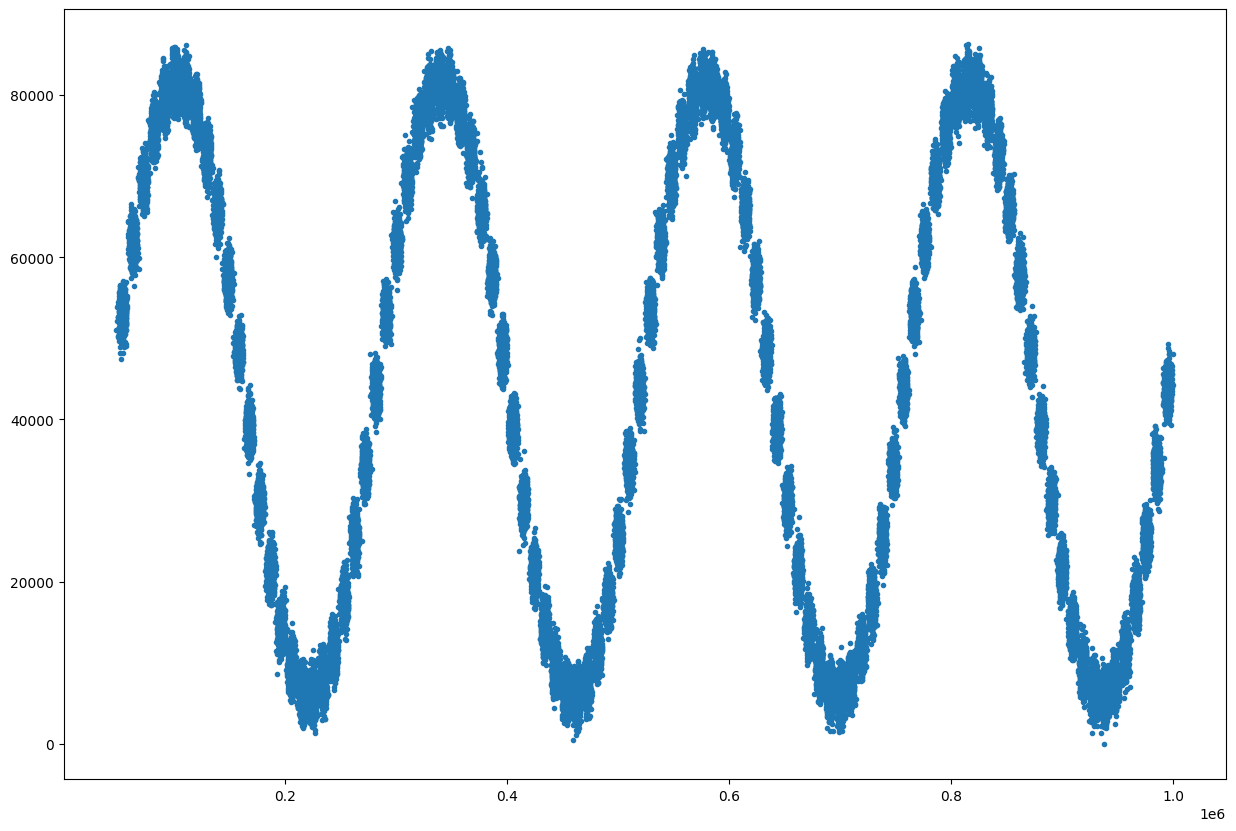

In [7]:
with open(fp) as file:
    cc = np.array([line.split() for line in file], dtype=np.float64)

fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(cc[:, 0], cc[:, 1], marker='.')
# print(cc[:, 0])
